# MULTIPLE LINEAR REGRESSION

Assignment Task:
Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.


In [271]:
import pandas as pd
df = pd.read_csv('ToyotaCorolla - MLR.csv')
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [272]:
df.shape

(1436, 11)

In [273]:
df_col = df.columns
df_col

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [274]:
df['Cylinders'].value_counts()

Cylinders
4    1436
Name: count, dtype: int64

# Taskes:

1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

In [275]:
df_numerical_col = df.select_dtypes(include='number').columns
df_numerical_col

Index(['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [276]:
df_stats = df[df_numerical_col].agg(['mean','median','std']).T
df_stats

,mean,median,std
Price,10730.824513,9900.0,3626.964585
Age_08_04,55.947075,61.0,18.599988
KM,68533.259749,63389.5,37506.448872
HP,101.502089,110.0,14.981080
Automatic,0.055710,0.0,0.229441
cc,1576.855850,1600.0,424.386770
Doors,4.033426,4.0,0.952677
Cylinders,4.000000,4.0,0.000000
Gears,5.026462,5.0,0.188510
Weight,1072.459610,1070.0,52.641120


- Visualizations

In [277]:
# !pip install numpy==1.24.4

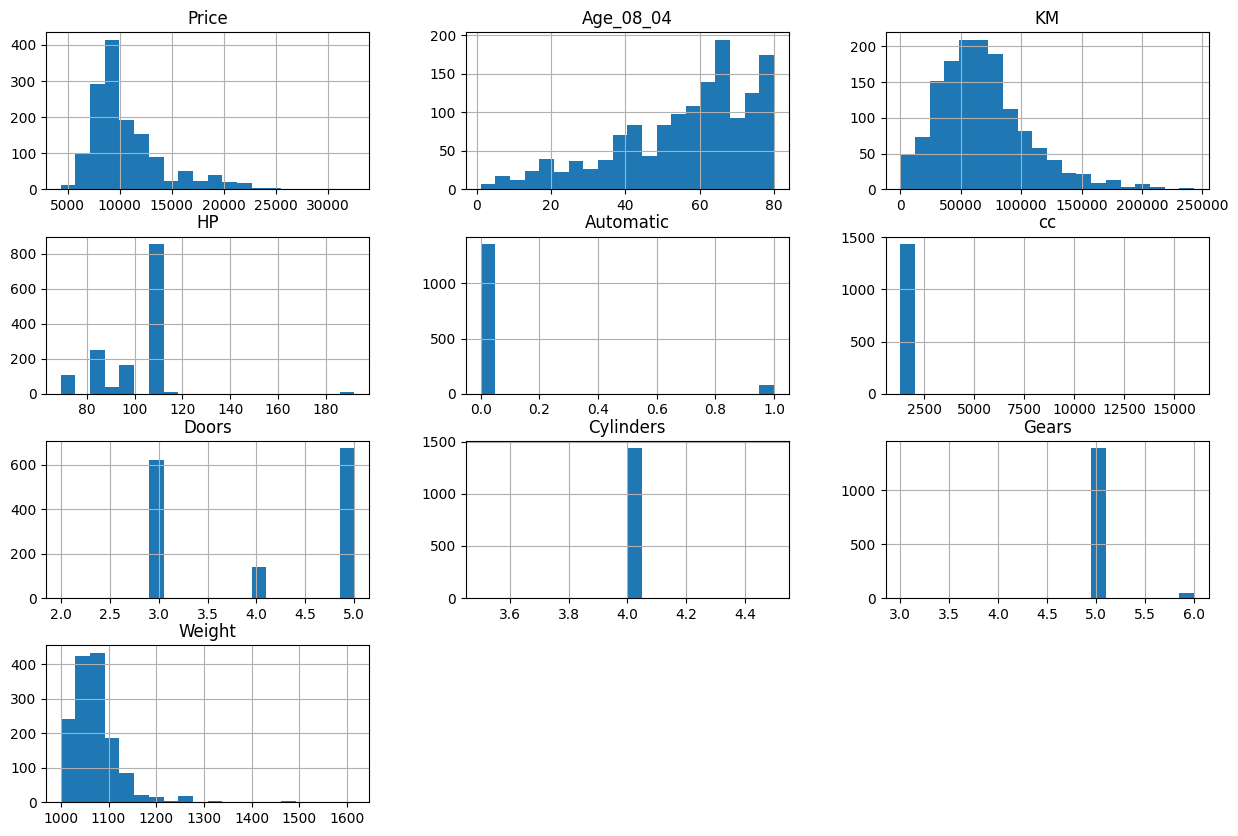

In [278]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram

df[df_numerical_col].hist(figsize=(15,10),bins=20)
plt.show()

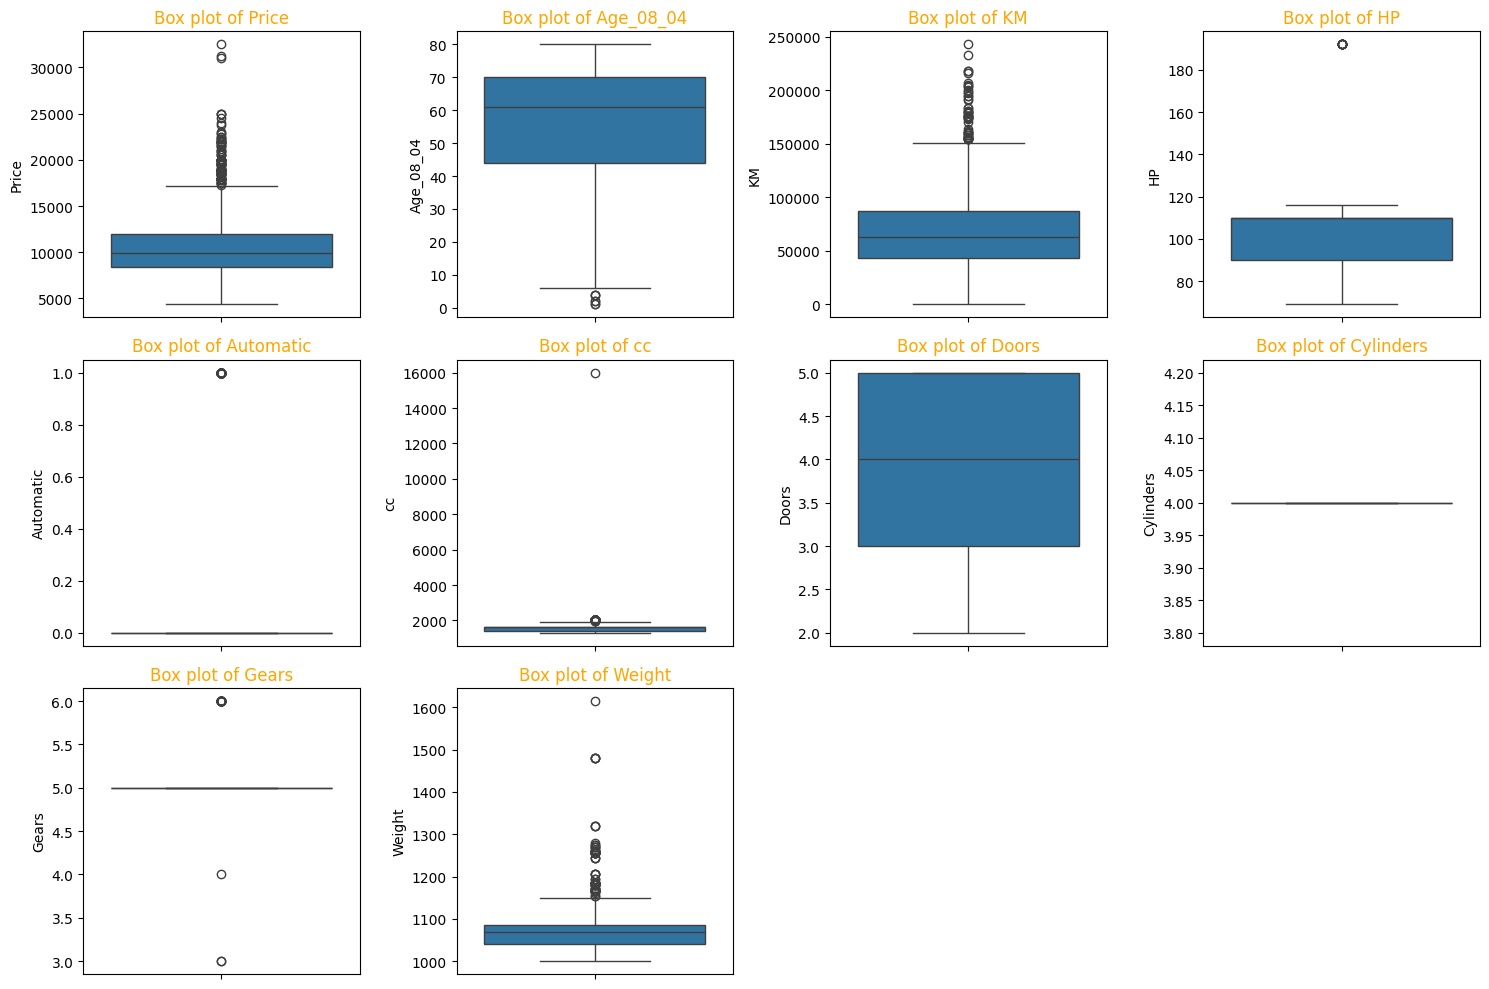

In [279]:
# Box Plot

plt.figure(figsize=(15,10))
for i,col in enumerate(df_numerical_col):
    plt.subplot(3,4,i+1)
    sns.boxplot(df[col])
    plt.title(f'Box plot of {col}',color='Orange')
plt.tight_layout()
plt.show()


In [280]:
# Preprocess
for col in df_numerical_col:
    print(col,"---",df[col].isna().sum())

Price --- 0
Age_08_04 --- 0
KM --- 0
HP --- 0
Automatic --- 0
cc --- 0
Doors --- 0
Cylinders --- 0
Gears --- 0
Weight --- 0


In [281]:
# Dummy columns
df_encoded = pd.get_dummies(df,drop_first=True,dtype='int')
df_encoded

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,1,0
1,13750,23,72937,90,0,2000,3,4,5,1165,1,0
2,13950,24,41711,90,0,2000,3,4,5,1165,1,0
3,14950,26,48000,90,0,2000,3,4,5,1165,1,0
4,13750,30,38500,90,0,2000,3,4,5,1170,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,0,1
1432,10845,72,19000,86,0,1300,3,4,5,1015,0,1
1433,8500,71,17016,86,0,1300,3,4,5,1015,0,1
1434,7250,70,16916,86,0,1300,3,4,5,1015,0,1


2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [282]:
Y = df['Price']
X = df_encoded.iloc[:,1:]

features_names = X.columns.tolist()
features_names

['Age_08_04',
 'KM',
 'HP',
 'Automatic',
 'cc',
 'Doors',
 'Cylinders',
 'Gears',
 'Weight',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol']

In [283]:
# Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

In [284]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [285]:
model_LR.coef_

array([-1.20830458e+02, -1.62314106e-02,  1.40394788e+01,  1.48830927e+02,
       -3.03721946e-02, -6.03109744e+01,  1.84741111e-12,  5.51600710e+02,
        2.58849583e+01, -6.85487568e+01,  1.37080891e+03])

In [286]:
model_LR.intercept_

-14255.385993565273

In [287]:
import numpy as np
y_pred = model_LR.predict(x_test)

from sklearn.metrics import r2_score,mean_squared_error
acc = r2_score(y_test,y_pred)
rmse_LR = np.sqrt(mean_squared_error(y_test,y_pred))
(acc*100,rmse_LR)

(83.48888040611084, 1484.265415329651)

In [288]:
# model - 2
from statsmodels.formula.api import ols
import numpy as np

train_df = pd.concat([x_train, y_train], axis=1)

model_OLS = ols('Price ~ (Age_08_04+KM+HP+Automatic+cc+Doors+Cylinders+Gears+Weight+Fuel_Type_Diesel+Fuel_Type_Petrol)'
                ,data=train_df).fit()

In [289]:
model_OLS.params

Intercept           -838.552117
Age_08_04           -120.830458
KM                    -0.016231
HP                    14.039479
Automatic            148.830927
cc                    -0.030372
Doors                -60.310974
Cylinders          -3354.208469
Gears                551.600710
Weight                25.884958
Fuel_Type_Diesel     -68.548757
Fuel_Type_Petrol    1370.808910
dtype: float64

In [290]:
acc2 = model_OLS.rsquared*100

In [291]:
y_pred_OLS = model_OLS.predict(x_test) 
y_pred_OLS

594     11137.154536
754      8974.973133
630      9283.270260
1259     8951.974408
903     10082.315929
            ...     
174     19192.104931
1428     8011.827889
297     13519.165117
1435    10720.331258
1009    10638.634347
Length: 288, dtype: float64

In [292]:
# RMSE
rmse_OLS = np.sqrt(mean_squared_error(y_test, y_pred_OLS))
rmse_OLS

1484.2654153297121

In [293]:
from statsmodels.formula.api import ols
import numpy as np
model_log_y = ols('np.log(Price) ~ (Age_08_04+KM+HP+Automatic+cc+Doors+Cylinders+Gears+Weight+Fuel_Type_Diesel+Fuel_Type_Petrol)',data=df_encoded).fit()

In [294]:
acc3 = model_log_y.rsquared*100

In [295]:
model_log_y.params

Intercept           4.807252e-01
Age_08_04          -1.054835e-02
KM                 -1.750534e-06
HP                  2.000620e-03
Automatic           4.587666e-02
cc                  6.314907e-07
Doors               9.247877e-03
Cylinders           1.922901e+00
Gears               7.598350e-02
Weight              1.010504e-03
Fuel_Type_Diesel    4.799715e-02
Fuel_Type_Petrol    6.445909e-02
dtype: float64

In [296]:
y_pred_OLS_log = model_log_y.predict(x_test)
y_pred_OLS_log = np.exp(y_pred_OLS_log)

In [297]:
rmse_OLS_log = np.sqrt(mean_squared_error(y_test, y_pred_OLS_log))
rmse_OLS_log

1176.490567200725

4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [298]:
Metrics_info = {
    "Models" : ['Model_LR','Model_OLS','Model_OLS_log'],
    "RSME": [rmse_LR,rmse_OLS,rmse_OLS_log],
    "Accuracy": [acc,acc2,acc3]
}

Metric_df = pd.DataFrame(Metrics_info)

In [299]:
Metric_df

,Models,RSME,Accuracy
0,Model_LR,1484.265415,0.834889
1,Model_OLS,1484.265415,87.026432
2,Model_OLS_log,1176.490567,85.018206


5.Apply Lasso and Ridge methods on the model.

In [308]:
# Ridge

from sklearn.linear_model import Ridge

model_ridge = Ridge(alpha=10)
model_ridge.fit(x_train,y_train)

y_pred_ridge = model_ridge.predict(x_test)

rmse_ridge =  np.sqrt(mean_squared_error(y_test,y_pred_ridge))
acc_ridge = r2_score(y_test,y_pred_ridge)

(rmse_ridge,acc_ridge*100)


(1472.1105509727417, 83.75819703308717)

In [309]:
# Lasso 

from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(x_train,y_train)

y_pred_lasso = model_lasso.predict(x_test)

rmse_lasso =  np.sqrt(mean_squared_error(y_test,y_pred_lasso))
acc_lasso = r2_score(y_test,y_pred_lasso)

(rmse_lasso,acc_lasso*100)

(1484.2393294724486, 83.48946076447356)

# Conclusion
- Coefficients: For LinearRegression/OLS, positive coef = increases price, negative = decreases. For dummy variables, coef is difference vs dropped category.

- Log model: coef ≈ % change in price for small coefficient values.

- Ridge/Lasso: Ridge shrinks coefficients (helps multicollinearity). Lasso can set some coefficients exactly to zero (feature selection).

# Interview Questions:
### 1.What is Normalization & Standardization and how is it helpful?
## Normalization 
- **Definition**: It rescales all feature values into a fixed range, typically [0, 1] or [-1, 1].
- **Formula**:  X′=(​X−Xmin​​)/(Xmax​−Xmin)
- **Purpose**: To bring all features to the same scale when their original units differ (e.g., “Age” in years vs. “Salary” in lakhs).
- **When to use**: Useful in distance-based algorithms like KNN, K-Means, or Neural Networks where scale affects distance computation.


## Standardization
- **Definition**: It transforms data so that it has mean = 0 and standard deviation = 1.
- **Formula**:  X′=(X−μ)/σ​
- **Purpose**: Removes bias from features with different variances and makes data resemble a standard normal distribution (bell curve).
- **When to use**: Especially in linear models (Linear Regression, Logistic Regression, SVM, PCA) where coefficients are sensitive to scale.

### How it helps overall:
- Prevents features with larger numeric ranges from dominating smaller ones.
- Improves gradient descent convergence in ML algorithms.
- Makes coefficients more interpretable in regression.
### 2.What techniques can be used to address multicollinearity in multiple linear regression?

***Multicollinearity***:
It occurs when two or more independent variables are highly correlated with each other — leading to unstable or unreliable coefficient estimates.
Symptoms include high VIF (Variance Inflation Factor) and erratic coefficient signs.

Techniques to handle it:

**Correlation Analysis**:
- Use a correlation matrix or heatmap to identify highly correlated features (|r| > 0.8).
- Drop one of the correlated variables to simplify the model.

**Variance Inflation Factor (VIF)**:
- Compute VIF for each feature; if VIF > 5 or 10, it indicates high multicollinearity.
- Remove or combine such features.

**Dimensionality Reduction**:
- Apply Principal Component Analysis (PCA) to convert correlated features into uncorrelated components.
- Useful when you want to retain all variance without dropping information.

**Regularization Methods**:
- Ridge Regression: Shrinks coefficients of correlated features (L2 penalty).
- Lasso Regression: Can shrink some coefficients to zero (L1 penalty), performing feature selection.
- These techniques stabilize model training and reduce overfitting.